# Gaussian XOR and Gaussian R-XOR BTE with OTP

In [1]:
import numpy as np
import ot
import ot.plot

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

import functions.xor_rxor_with_otp_functions as fn
from proglearn.sims import generate_gaussian_parity

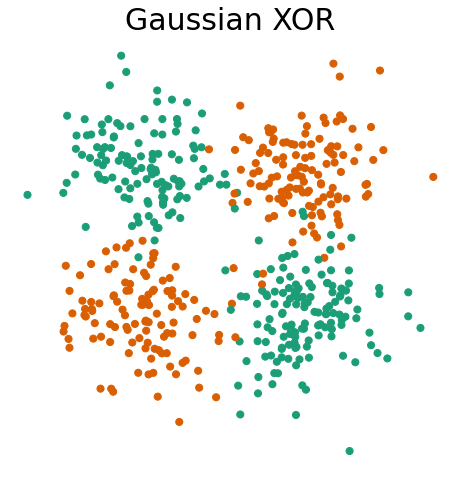

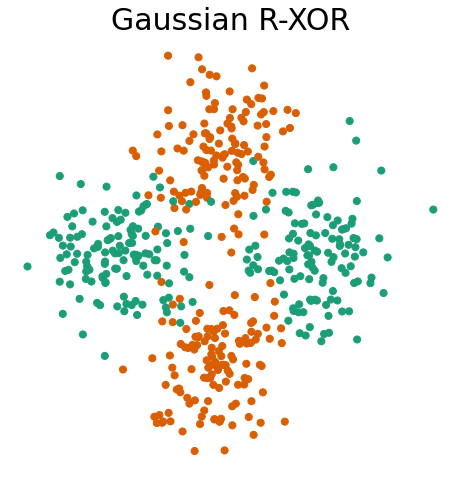

In [8]:
# call function to return gaussian xor and r-xor data:
X_t, y_t = generate_gaussian_parity(500)
X_s, y_s = generate_gaussian_parity(500, angle_params=np.pi/4)

# plot and format:
fn.plot_xor_rxor(X_t, y_t, 'Gaussian XOR')
fn.plot_xor_rxor(X_s, y_s, 'Gaussian R-XOR')

In [16]:
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=5e-2)
ot_sinkhorn.fit(Xs=X_s, Xt=X_t, ys=y_s, yt=y_t)

ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=X_s, Xt=X_t, ys=y_s, yt=y_t)

In [17]:
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=X_s)
transp_Xs_emd = ot_emd.transform(Xs=X_s)

Text(0.5, 1.0, 'Main coupling coefficients\nSinkhornTransport')

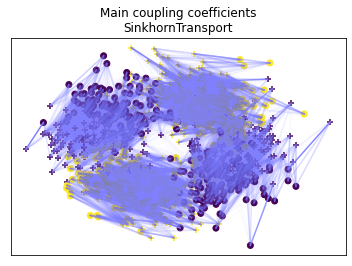

In [11]:
ot.plot.plot2D_samples_mat(X_s, X_t, ot_sinkhorn.coupling_, c=[.5, .5, 1])
pl.scatter(X_s[:, 0], X_s[:, 1], c=y_s, marker='+', label='Source samples')
pl.scatter(X_t[:, 0], X_t[:, 1], c=y_t, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornTransport')

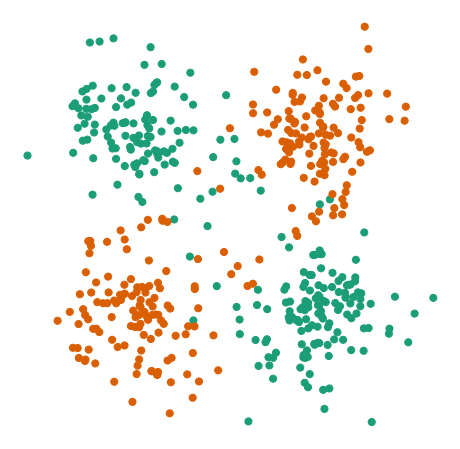

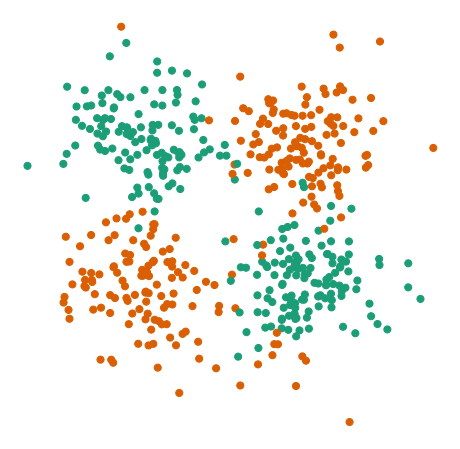

In [18]:
def get_colors(colors, inds):
    c = [colors[i] for i in inds]
    return c

colors = sns.color_palette("Dark2", n_colors=2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=get_colors(colors, y_s), s=50)
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")
plt.show()

colors = sns.color_palette("Dark2", n_colors=2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=get_colors(colors, y_s), s=50)
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")
plt.show()

## The Experiment (Various Angles vs BTE)

Now that we have generated the data, we can prepare to run the experiment. The function for running the experiment, experiment, can be found within functions/xor_rxor_with_icp_functions.py.

In this experiment, we will be running two progressive learning classifiers. One classifier will be given a XOR task and a R-XOR task (adaptation off). One classifier will be given a XOR task and a R-XOR task adapted to the original XOR i.e. A-XOR (adaptation on). The backward transfer efficiency of both classifiers will be evaluated over a wide range of angles of the R-XOR task.

We first declare the hyperparameters to be used for the experiment, which are as follows:
* `mc_rep`: number of repetitions to run the progressive learning algorithm for
* `angle_sweep`: angles to test
* `task1_sample`: number of task 1 samples
* `task2_sample`: number of task 2 samples

In [2]:
angle_sweep = range(0,91,10)
task1_sample = 100
task2_sample = 100
mc_rep = 500

First, we will run the classifier with adaptation off:

In [3]:
mean_te1 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.8s finished
[

Next, we will run the classifier with adaptation on:

In [4]:
mean_te2 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.3s finished
[

Lastly, plot the results:

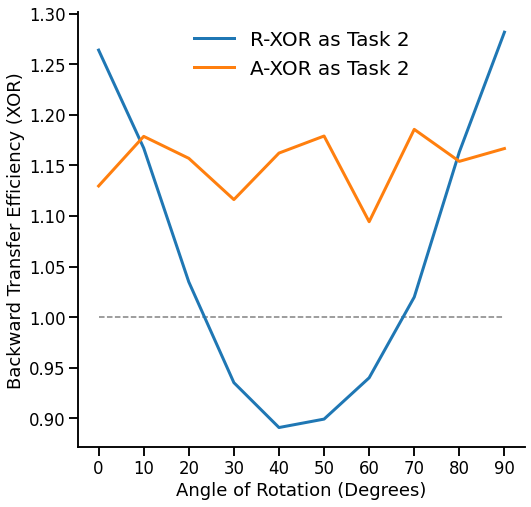

In [5]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te2)